## Load Packages

In [1]:
suppressPackageStartupMessages(suppressWarnings(library('ggplot2')))
suppressPackageStartupMessages(suppressWarnings(library('DESeq2')))
suppressPackageStartupMessages(suppressWarnings(library('viridis')))

## Set work dir

In [2]:
setwd('C:/Users/1010/Desktop/Data_ReadsCount/')

## Read the expresion matrix

In [3]:
readcount <- read.csv('readcount.csv')
rownames(readcount) <- readcount$X
readcount <- readcount[,-1]
head(readcount)

,STM1,STM2,ST481,ST482,TSM1,TSM2,TS481,TS482,EVTM481,EVTM482,EVTV481,EVTV482
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,1406,1234,1420,1312,1971,1736,2077,1990,1230,1235,946,1295
ENSG00000000005,6,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,3014,3176,3296,3076,6231,5550,2396,2192,4085,4226,3621,4545
ENSG00000000457,611,552,655,599,675,539,1568,1667,807,813,766,702
ENSG00000000460,266,334,366,356,856,845,1644,1713,632,606,496,528
ENSG00000000938,4,0,8,1,0,1,22,20,4,3,0,4


## Counstruct the analysis matrix

In [4]:
mycounts <- readcount

condition <- factor(c(rep("STM",2),rep("ST48",2),rep("TSM",2),rep("TS48",2),rep("EVTM",2),rep("EVTV48",2)), 
                    levels = c("STM","ST48","TSM","TS48","EVTM","EVTV48"))
colData <- data.frame(row.names=colnames(mycounts), condition)
colData

,condition
,<fct>
STM1,STM
STM2,STM
ST481,ST48
ST482,ST48
TSM1,TSM
TSM2,TSM
TS481,TS48
TS482,TS48
EVTM481,EVTM


## Analysis DEG

In [5]:
dds_new <- DESeqDataSetFromMatrix(mycounts, colData, design= ~ condition)
dds_new <- DESeq(dds_new)
dds_new

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



class: DESeqDataSet 
dim: 60649 12 
metadata(1): version
assays(4): counts mu H cooks
rownames(60649): ENSG00000000003 ENSG00000000005 ... ENSG00000288724
  ENSG00000288725
rowData names(38): baseMean baseVar ... deviance maxCooks
colnames(12): STM1 STM2 ... EVTV481 EVTV482
colData names(2): condition sizeFactor

## PCA plot

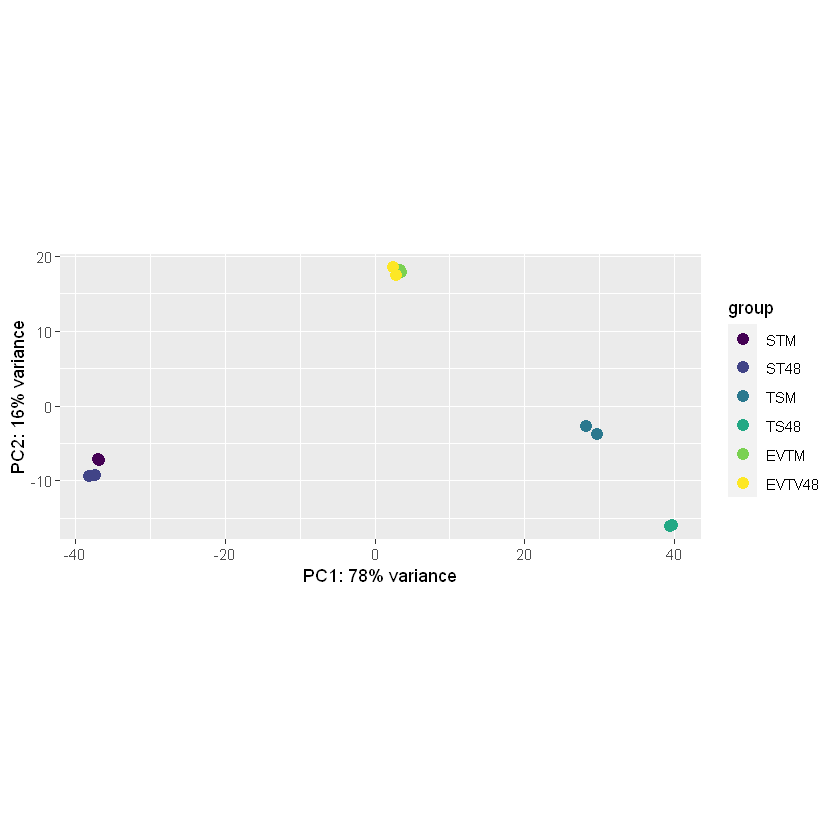

In [6]:
vsdata <- vst(dds_new, blind=FALSE)
p <- plotPCA(vsdata, intgroup="condition") + scale_color_viridis(discrete = TRUE)
p 